#  911 Calls Capstone Project

For this project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

____
** Importing Libraries and Data **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Visualize missing data

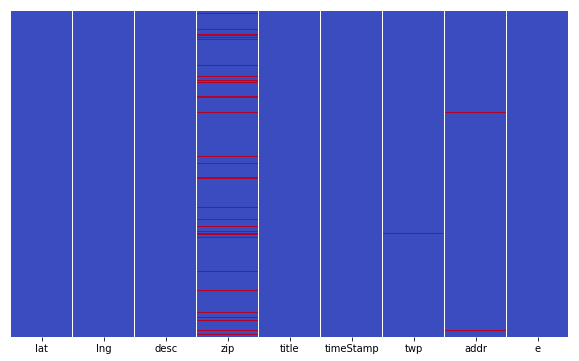

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='coolwarm',yticklabels=False,cbar=False)

In [6]:
df_new1=df.copy()

### Fixing Missing Data and visualizing it 

In [7]:
df_new1['zip']=df['zip'].fillna(value=df['zip'].mode())
df_new1=df_new1.dropna(axis=0)

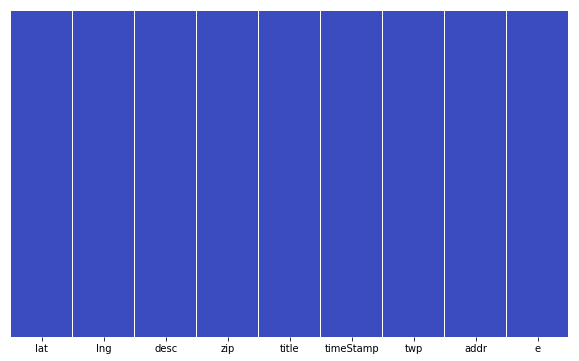

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new1.isnull(),cmap='coolwarm',yticklabels=False,cbar=False)

** What are the top 5 zipcodes and townships for 911 calls? **


In [9]:
df_new1['zip'].value_counts().head(5)

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
Name: zip, dtype: int64

In [10]:
df_new1['twp'].value_counts().head(5)

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4029
CHELTENHAM      3942
Name: twp, dtype: int64

In [11]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression I created a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [12]:
df_new1['Reason'] = df_new1['title'].apply(lambda title: title.split(':')[0])

In [13]:
df_new1['Reason'].value_counts()

EMS        44318
Traffic    29254
Fire       13004
Name: Reason, dtype: int64

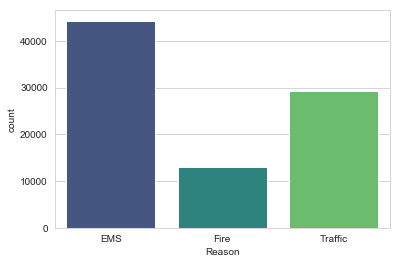

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Reason',data=df_new1,palette='viridis')

In [19]:
type(df_new1['timeStamp'][0])

str

** Converting the column from strings to DateTime objects. **

In [21]:
df_new1['timeStamp']=pd.to_datetime(df_new1['timeStamp'])

In [25]:
type(df_new1['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [106]:
df_new1['Month']=df_new1['timeStamp'].apply(lambda time:time.month)
df_new1['Hour']=df_new1['timeStamp'].apply(lambda time:time.hour)
df_new1['Day Of Week']=df_new1['timeStamp'].apply(lambda time:time.dayofweek)

In [107]:
dmap={0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df_new1['Day Of Week']=df_new1['Day Of Week'].map(dmap)

In [108]:
df_new1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day Of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thurs,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thurs,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thurs,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thurs,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,17,Thurs,2015-12-10


* Creating countplot of the Day of the week and Month with the hue based off of the Reason column *

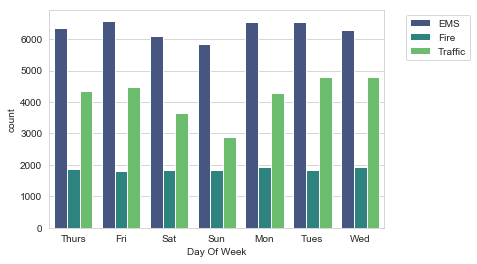

In [56]:
sns.countplot(x='Day Of Week',data=df_new1,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)

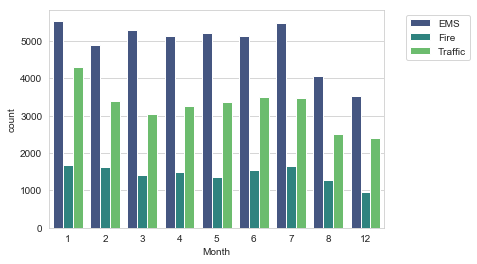

In [58]:
sns.countplot(x='Month',data=df_new1,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)

* Since there is no '9,10,11' Month column, we can fill in this information by plotting a line plot *

In [66]:
df_byMonth=df_new1.groupby('Month').count()

In [67]:
df_byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939


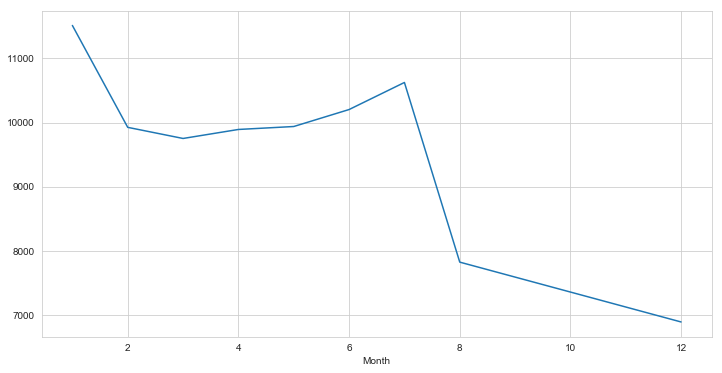

In [69]:
plt.figure(figsize=(12,6))
#Could be any column 
df_byMonth['twp'].plot.line()

In [71]:
df_byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
0,1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
1,2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
2,3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
3,4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
4,5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939
5,6,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203
6,7,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624
7,8,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829
8,12,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898


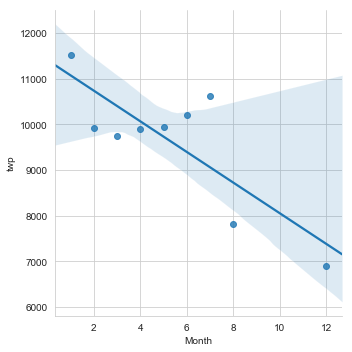

In [75]:
sns.lmplot(x='Month',y='twp',data=df_byMonth.reset_index())

In [79]:
df_new1['Date']=df_new1['timeStamp'].apply(lambda t:t.date())
df_new1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day Of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thurs,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thurs,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thurs,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thurs,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,17,Thurs,2015-12-10


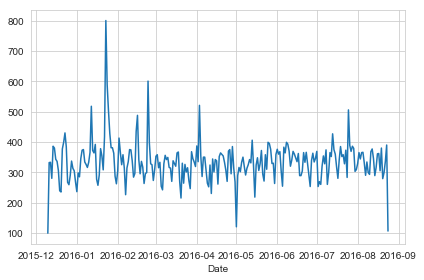

In [86]:
df_byDate=df_new1.groupby('Date').count()['twp'].plot()
plt.tight_layout()

* Now we can analyze this 'Date' column on the basis of 'Reason' for 911 calls *

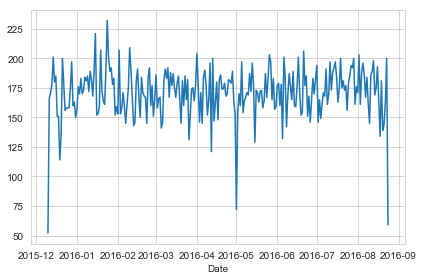

In [90]:
df_new1[df_new1['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

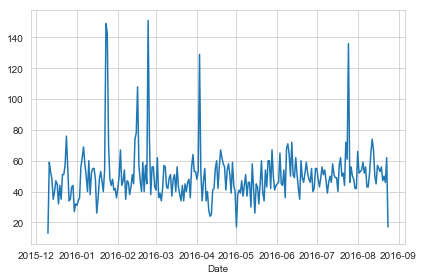

In [91]:
df_new1[df_new1['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

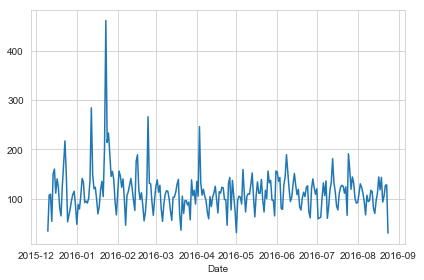

In [92]:
df_new1[df_new1['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [95]:
df_new1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day Of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thurs,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thurs,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thurs,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thurs,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,17,Thurs,2015-12-10


* Creating some visualization through Heatmap and Clustermap *

In [128]:
dayhour=df_new1.groupby(['Day Of Week','Hour']).count()['Reason'].unstack()

In [129]:
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Mon,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Sat,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sun,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thurs,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307
Tues,241,214,161,148,184,203,350,563,719,763,...,821,823,867,896,759,665,578,494,411,245
Wed,225,193,169,193,138,224,332,591,769,714,...,787,760,860,878,771,590,596,507,432,294


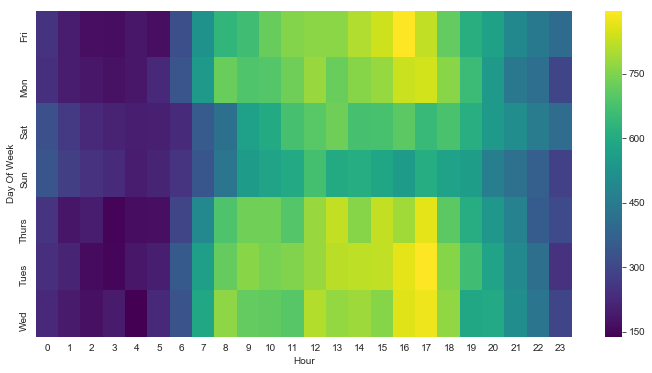

In [130]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

<Figure size 864x432 with 0 Axes>

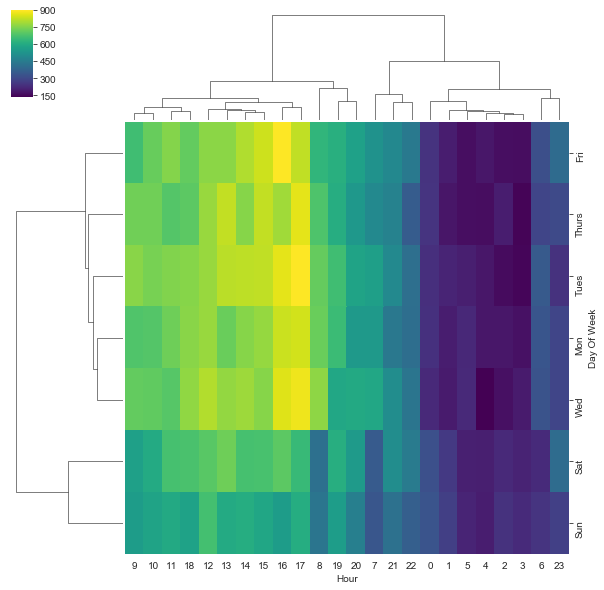

In [131]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour,cmap='viridis')

In [133]:
dayMonth=df_new1.groupby(['Day Of Week','Month']).count()['Reason'].unstack()

In [134]:
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day Of Week,,,,,,,,,
Fri,1735,1360,1331,1683,1504,1429,1810,1123,905
Mon,1505,1658,1364,1401,1547,1395,1472,1315,1100
Sat,1979,1240,1110,1512,1264,1201,1507,955,831
Sun,1726,1058,973,1304,1230,1136,1440,878,805
Thurs,1387,1391,1648,1390,1387,1800,1447,1038,1087
Tues,1697,1535,1647,1255,1658,1452,1446,1415,1092
Wed,1482,1684,1680,1348,1349,1790,1502,1105,1078


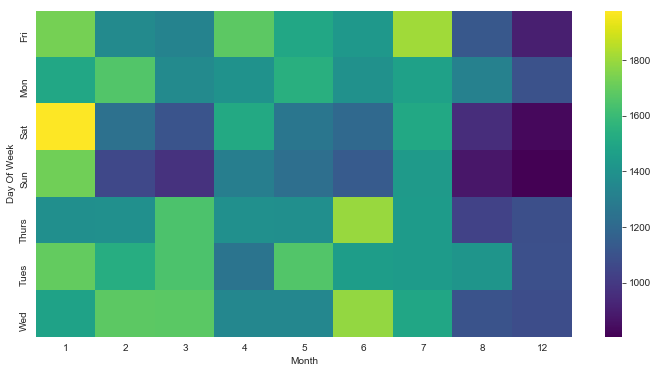

In [135]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

<Figure size 864x432 with 0 Axes>

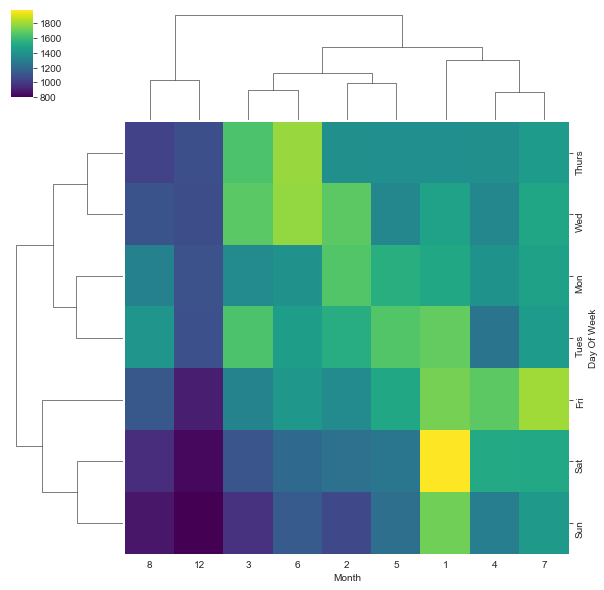

In [136]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis')